In [22]:
import pandas as pd
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt



In [7]:
labels = pd.read_csv('D:/Dissertation/Final_Predictions.csv')

In [10]:
labels.head(5)

,Unnamed: 0,Date,Tweet,Predicted Label
0,0,25/04/2023 19:24,#TheKerlaStory,Manipulator
1,1,26/04/2023 19:19,Just watched the trailer of #thekerlastory 😬\n...,Supporter
2,2,26/04/2023 19:14,@Starboy2079 #mustwatcgthekerlastory #Thekerla...,Manipulator
3,3,26/04/2023 19:11,#Thekerlastory 👍🏻👍🏻🩷🩷,Supporter
4,4,26/04/2023 18:19,#TheKerlaStory @ARanganathan72\nhttps://t.co/5...,Neutral


In [8]:
labels.shape[0]

12272

In [11]:
label_counts = labels['Predicted Label'].value_counts()


In [12]:
print(label_counts)

Predicted Label
Supporter      9351
Manipulator    1800
Neutral         810
Against         311
Name: count, dtype: int64


In [31]:
supporter = labels[labels["Predicted Label"] == 'Supporter']
against = labels[labels["Predicted Label"] == 'Against']
neutral = labels[labels["Predicted Label"] == 'Neutral']
manipulator = labels[labels["Predicted Label"] == 'Manipulator']

In [45]:
supporter_text = "".join(text for text in supporter.Tweet)
against_text = "".join(text for text in against.Tweet)
neutral_text = "".join(text for text in neutral.Tweet)
manipulator_text = "".join(text for text in manipulator.Tweet)

In [46]:
supporter_text = re.sub(r'http\S+', '', supporter_text, flags=re.MULTILINE)
against_text = re.sub(r'http\S+', '', against_text, flags=re.MULTILINE)
neutral_text = re.sub(r'http\S+', '', neutral_text, flags=re.MULTILINE)
manipulator_text = re.sub(r'http\S+', '', manipulator_text, flags=re.MULTILINE)

In [19]:
stopwords = set(STOPWORDS)

In [21]:
stopwordsEnglish = open('D:/Dissertation/dissertation/Untitled Folder/stopwords_english.txt',encoding = 'utf8')
stopwords_english = []
for i in stopwordsEnglish:
    i = re.sub('[\n]','',i)
    stopwords_english.append(i)
    
stopwordsEnglish = set(stopwords_english)
stopwords = stopwords.union(stopwordsEnglish)

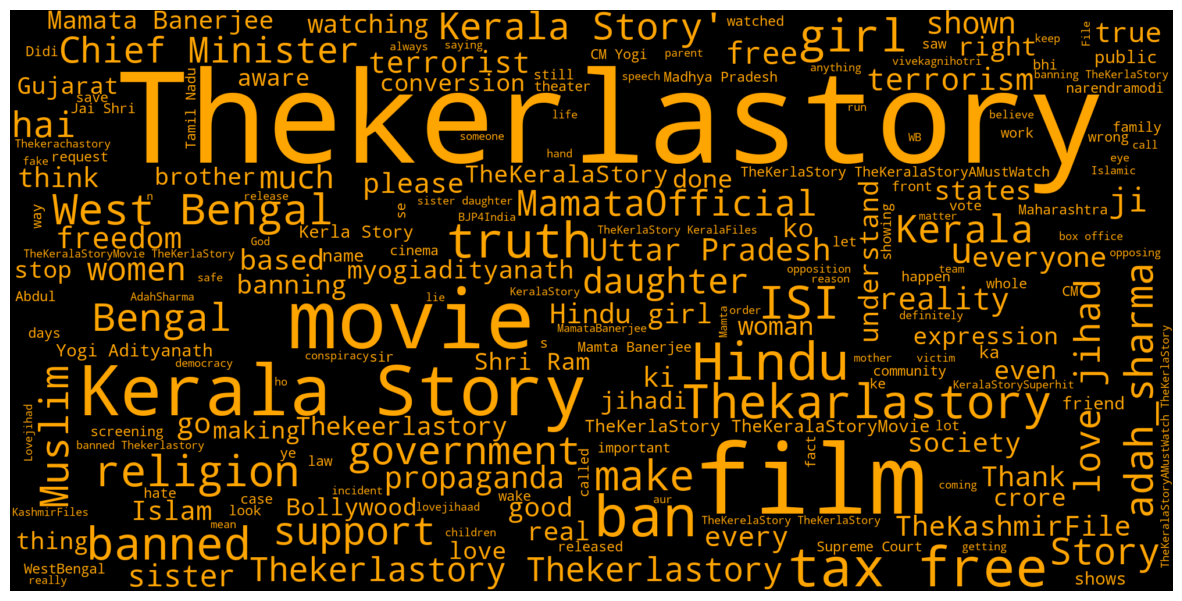

In [41]:
wordcloud_supporter = WordCloud(stopwords=stopwords, background_color='black', color_func=lambda *args, **kwargs: "orange",height = 1000, width = 2000).generate(supporter_text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_supporter, interpolation='bilinear')
plt.axis("off")
plt.show()

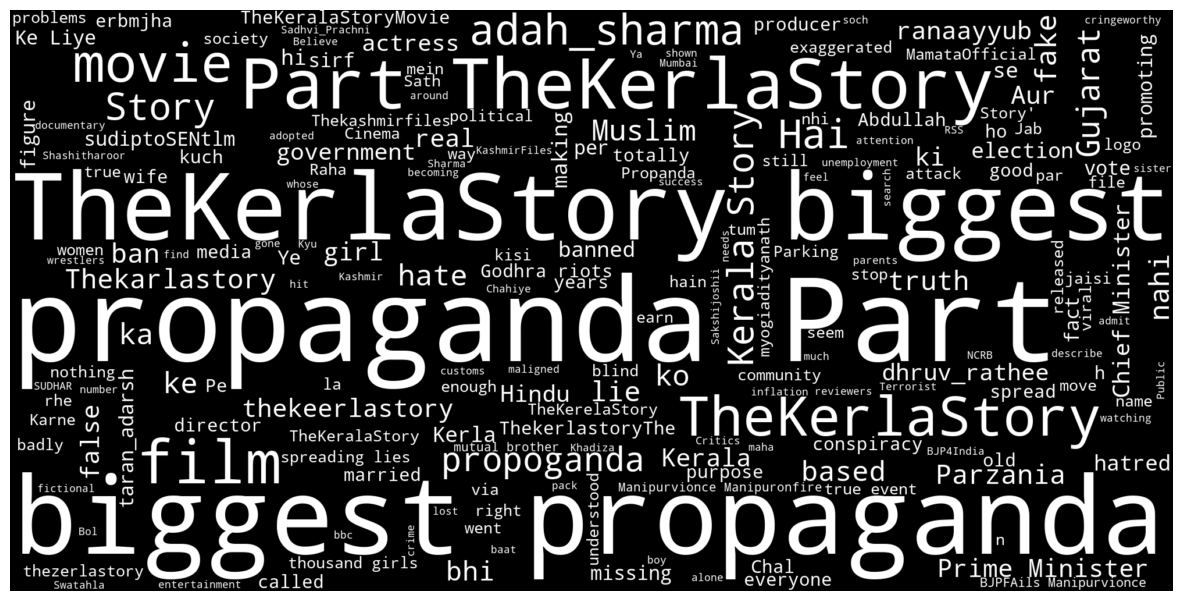

In [37]:
wordcloud_against = WordCloud(stopwords=stopwords, background_color="black",height = 1000, width = 2000, color_func=lambda *args, **kwargs: "white").generate(against_text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_against, interpolation='bilinear')
plt.axis("off")
plt.show()

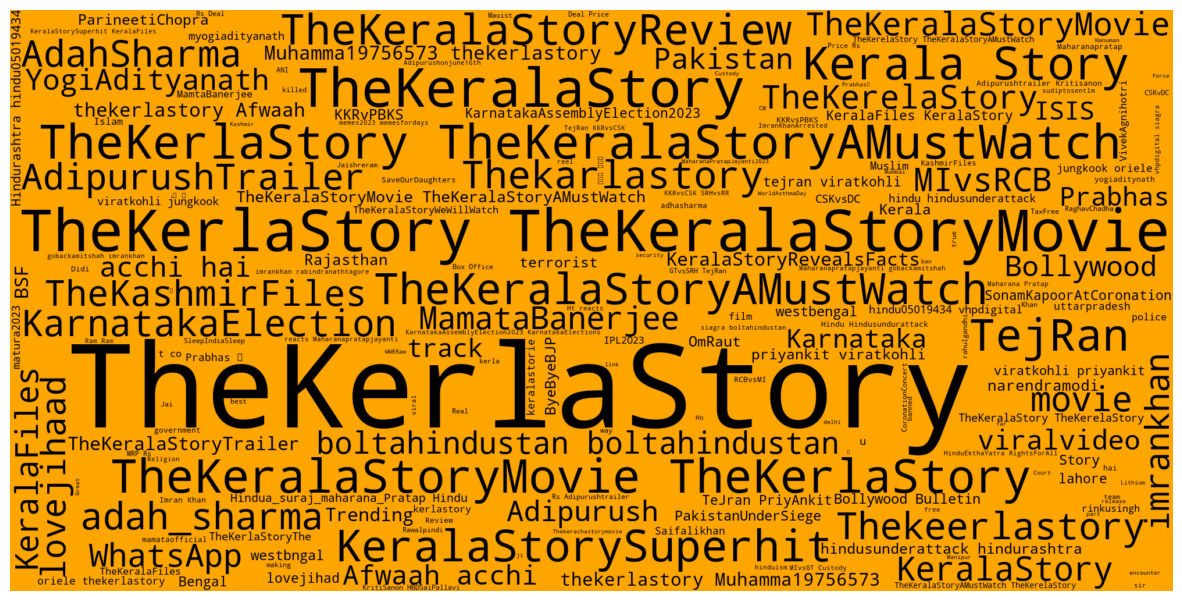

In [56]:
wordcloud_manipulator = WordCloud(stopwords=stopwords, background_color="orange",color_func=lambda *args, **kwargs: "black",max_font_size=200,height = 1000, width = 2000).generate(manipulator_text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_manipulator, interpolation='bilinear')
plt.axis("off")
plt.show()

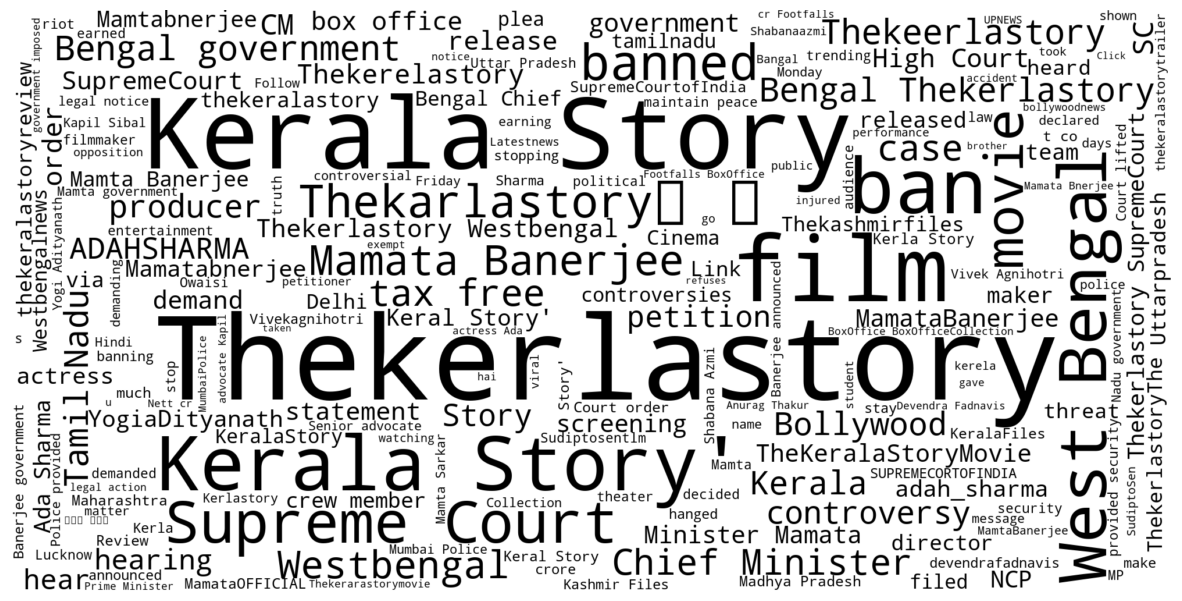

In [58]:
wordcloud_neutral = WordCloud(stopwords=stopwords, background_color="white",color_func=lambda *args, **kwargs: "black",max_font_size=200,height = 1000, width = 2000).generate(neutral_text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis("off")
plt.show()